In [1]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
consumerKey = "dESc2np7NEyIR4OyQff5EKqDv"
consumerSecret = "7YzJC6ylSHcLMrXLantZxPEwm0zGa3xOuSFuEvRe42giL7vmK0"
accessToken = "714414466373394433-4df0quDG5QsnyonmwmtAzpfqGOpa6Oh"
accessTokenSecret = "sNXDoqS5Pt959Eme9Emg26lIF8Y9HJi6pyytO615dKnnC"

In [4]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) 
    
# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret) 
    
# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [5]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name="ArvindKejriwal", count = 100, lang ="en", tweet_mode="extended")

#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 5 recent tweets:

1) RT @SatyendarJain: Delhi Govt. is all set to revolutionise the school system through a unique initiative-Aam Aadmi School Health Clinics, w…

2) RT @kgahlot: Flagged off 100 new CNG buses along with all-new Electric bus from DTC Indraprastha depot today. Under visionary leadership of…

3) दिल्ली के सरकारी स्कूलों में बच्चों को अच्छी शिक्षा के साथ-साथ अब उनकी अच्छी सेहत का भी ख़्याल रखा जाएगा। ये शानदार ‘स्कूल हेल्थ क्लीनिक’ भी अब हमारे सरकारी स्कूलों का हिस्सा होंगे। https://t.co/RSqfFXDOGA

4) ये भाजपा है। निहायत गुंडों और लफ़ंगों की पार्टी। जब ये हार रहे होते हैं तो अपनी औक़ात दिखा देते हैं। इन्हें जनता इनकी औक़ात बतायेगी। https://t.co/dyULebGhYi

5) RT @msisodia: 2 key MoUs signed between Delhi Govt &amp; British Council @inbritish

1. Work together in Teacher Training, Spoken English &amp; Hig…



In [6]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

,Tweets
0,RT @SatyendarJain: Delhi Govt. is all set to r...
1,RT @kgahlot: Flagged off 100 new CNG buses alo...
2,दिल्ली के सरकारी स्कूलों में बच्चों को अच्छी श...
3,ये भाजपा है। निहायत गुंडों और लफ़ंगों की पार्ट...
4,RT @msisodia: 2 key MoUs signed between Delhi ...


In [11]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df.head

<bound method NDFrame.head of                                                Tweets  Subjectivity  Polarity
0   : Delhi Govt. is all set to revolutionise the ...      1.000000  0.375000
1   : Flagged off 100 new CNG buses along with all...      0.454545  0.136364
2   दिल्ली के सरकारी स्कूलों में बच्चों को अच्छी श...      0.000000  0.000000
3   ये भाजपा है। निहायत गुंडों और लफ़ंगों की पार्ट...      0.000000  0.000000
4   : 2 key MoUs signed between Delhi Govt &amp; B...      0.333333  0.000000
..                                                ...           ...       ...
95  _ind: Ludhiana ke Autowalo ko Suniye 🤣🤣🤣\n\nIk...      0.000000  0.000000
96  Give one chance to AAP in Goa. Voting for Cong...      0.500000  0.136364
97  Saw this little girl in St Cruz today. \n\nBet...      0.650000  0.106250
98           __: Goa me bhi AAP Chahiye Public ko ✌️       0.066667  0.000000
99  Addressing a public meeting in Goa's Poriem co...      0.283333  0.068182

[100 rows x 3 columns]>

In [12]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df.head

<bound method NDFrame.head of                                                Tweets  Subjectivity  Polarity
0   : Delhi Govt. is all set to revolutionise the ...      1.000000  0.375000
1   : Flagged off 100 new CNG buses along with all...      0.454545  0.136364
2   दिल्ली के सरकारी स्कूलों में बच्चों को अच्छी श...      0.000000  0.000000
3   ये भाजपा है। निहायत गुंडों और लफ़ंगों की पार्ट...      0.000000  0.000000
4   : 2 key MoUs signed between Delhi Govt &amp; B...      0.333333  0.000000
..                                                ...           ...       ...
95  _ind: Ludhiana ke Autowalo ko Suniye 🤣🤣🤣\n\nIk...      0.000000  0.000000
96  Give one chance to AAP in Goa. Voting for Cong...      0.500000  0.136364
97  Saw this little girl in St Cruz today. \n\nBet...      0.650000  0.106250
98           __: Goa me bhi AAP Chahiye Public ko ✌️       0.066667  0.000000
99  Addressing a public meeting in Goa's Poriem co...      0.283333  0.068182

[100 rows x 3 columns]>

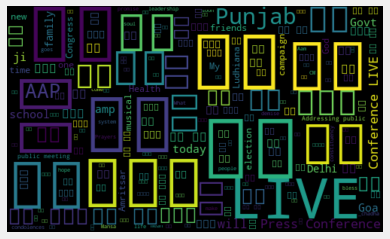

In [13]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [15]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df.head

<bound method NDFrame.head of                                                Tweets  Subjectivity  Polarity  \
0   : Delhi Govt. is all set to revolutionise the ...      1.000000  0.375000   
1   : Flagged off 100 new CNG buses along with all...      0.454545  0.136364   
2   दिल्ली के सरकारी स्कूलों में बच्चों को अच्छी श...      0.000000  0.000000   
3   ये भाजपा है। निहायत गुंडों और लफ़ंगों की पार्ट...      0.000000  0.000000   
4   : 2 key MoUs signed between Delhi Govt &amp; B...      0.333333  0.000000   
..                                                ...           ...       ...   
95  _ind: Ludhiana ke Autowalo ko Suniye 🤣🤣🤣\n\nIk...      0.000000  0.000000   
96  Give one chance to AAP in Goa. Voting for Cong...      0.500000  0.136364   
97  Saw this little girl in St Cruz today. \n\nBet...      0.650000  0.106250   
98           __: Goa me bhi AAP Chahiye Public ko ✌️       0.066667  0.000000   
99  Addressing a public meeting in Goa's Poriem co...      0.283333  0.068182  

In [ ]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()